# Predicting Loan Eligibility

This problem is about assessing the loan eligibility.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of variables.

This is a type of binary classification:

In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_original=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_original=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(train_original.shape)
print(test_original.shape)

(614, 13)
(367, 12)


In [6]:
train=train_original.copy()
test=test_original.copy()
# make a copy of original data.

In [7]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_original.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Now let us look in to the each variable and can make some assumptions.(It’s just assumptions right, there is no harm in just assuming few statements)

**Loan ID** -> As the name suggests each person should have a unique loan ID.<br>
**Gender** -> In general it is male or female. No offence for not including the third gender.<br>
**Married** -> Applicant who is married is represented by Y and not married is represented as N. The information regarding whether the applicant who is married is divorced or not has not been provided. So we don’t need to worry regarding all these.<br>
**Dependents** -> the number of people dependent on the applicant who has taken loan has been provided.<br>
**Education** -> It is either non -graduate or graduate. The assumption I can make is “ The probability of clearing the loan amount would be higher if the applicant is a graduate”.<br>
**Self_Employed** -> As the name suggests Self Employed means , he/she is employed for himself/herself only. So freelancer or having a own business might come in this category. An applicant who is self employed is represented by Y and the one who is not is represented by N.<br>
**Applicant Income** -> Applicant Income suggests the income by Applicant.So the general assumption that i can make would be “The one who earns more have a high probability of clearing loan amount and would be highly eligible for loan ”.<br>
**CoapplicantIncome** -> this represents the income of co-applicant. I can also assume that " If co applicant income is higher, the probability of being eligible would be higher"
**Loan Amount** -> This amount represents the loan amount in thousands. One assumption I can make is that “ If Loan amount is higher , the probability of repaying would be lesser and vice versa”<br>
**Loan_Amount_Term** -> This represents the number of months required to repay the loan.<br>
**Credit_History** -> When I googled it , I got this information. A credit history is a record of a borrower’s responsible repayment of debts. It suggests → 1 denotes that the credit history is good and 0 otherwise.<br>
**Property_Area** -> The area where they belong to is my general assumption as nothing more is told. Here it can be three types. Urban or Semi Urban or Rural.<br>
**Loan_Status** -> If the applicant is eligible for loan it’s yes represented by Y else it’s no represented by N.

# Understanding the various features(columns)of the dataset.

In [9]:
#Summary of numerical variable for traning data set.
train_original.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Exploratory Data Analysis

  For the non-numerical values(eg.Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. 

Get the unique values and their frequency of variable of non-numeric data.

**Now let us analyse the data using single variable.**

In [10]:
train_original['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
train_original['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
train_original['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
train_original['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [14]:
train_original['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
train_original['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
train_original['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [17]:
train_original['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

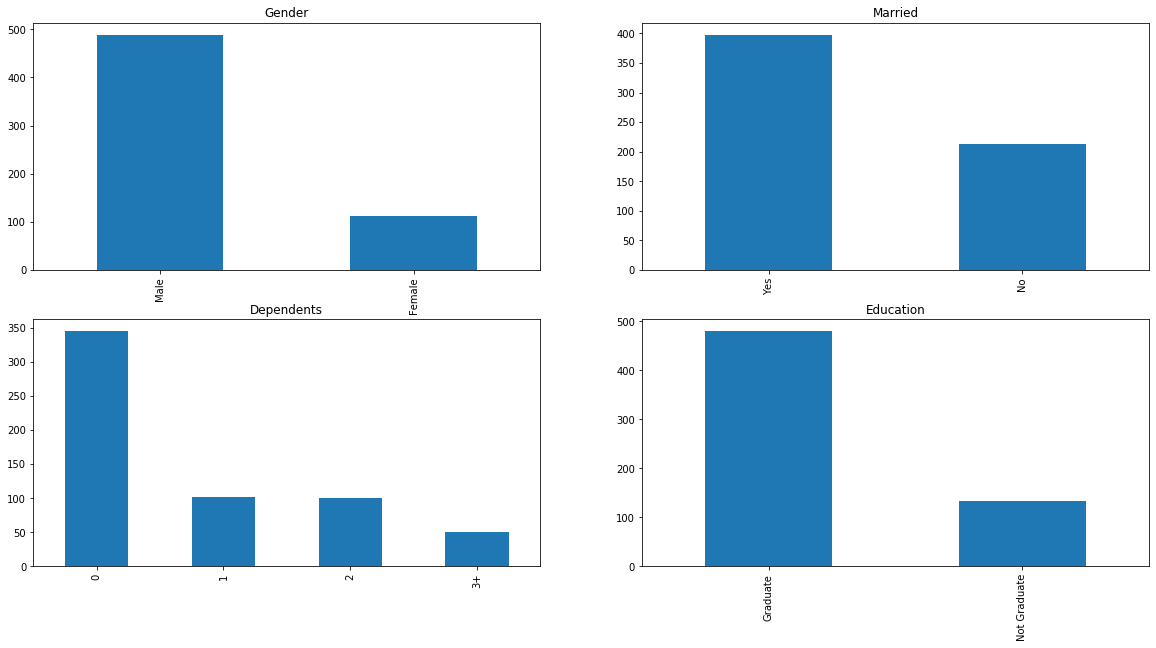

In [18]:
plt.figure(1)
plt.subplot(221)
train_original['Gender'].value_counts().plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train_original['Married'].value_counts().plot.bar(title= 'Married')

plt.subplot(223)
train_original['Dependents'].value_counts().plot.bar(title= 'Dependents')

plt.subplot(224)
train_original['Education'].value_counts().plot.bar(title= 'Education')



plt.show()

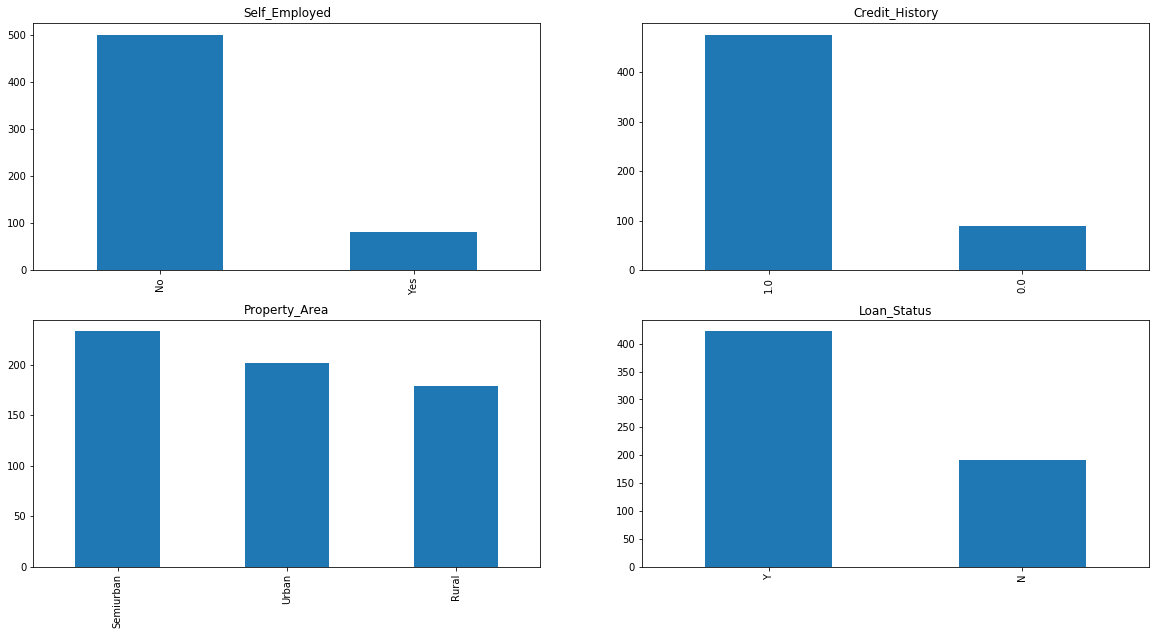

In [19]:
plt.figure(1)
plt.subplot(221)
train_original['Self_Employed'].value_counts().plot.bar(figsize=(20,10),title= 'Self_Employed')

plt.subplot(222)
train_original['Credit_History'].value_counts().plot.bar(title= 'Credit_History')
                                                         
plt.subplot(223)
train_original['Property_Area'].value_counts().plot.bar(title='Property_Area')

plt.subplot(224)
train_original['Loan_Status'].value_counts().plot.bar(title='Loan_Status')
plt.show()

***conclusions: (Through Single Variable Analysis)***

1.We can see that approximately 81% are Male and 19% are female.<br>
2.Percentage of applicants with no dependents is higher.<br>
3.There are more number of graduates than non graduates.<br>
4.Semi Urban people is slightly higher than Urban people among the applicants.<br>
5.Larger Percentage of people have a good credit history.<br>
6.The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.

**Visualizing numerical features.**

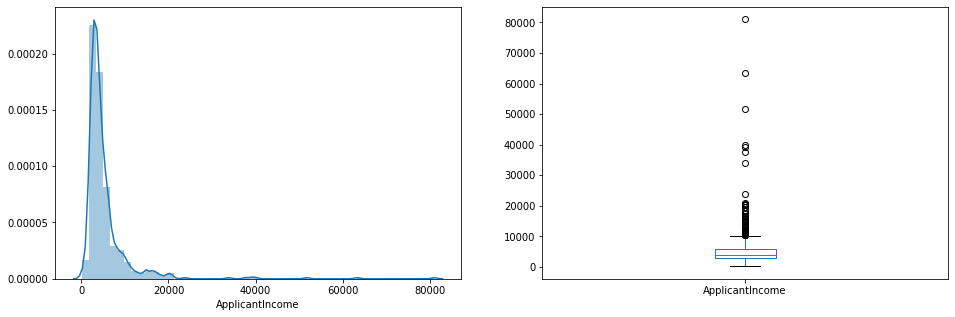

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_original['ApplicantIncome'])

plt.subplot(122)
train_original['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

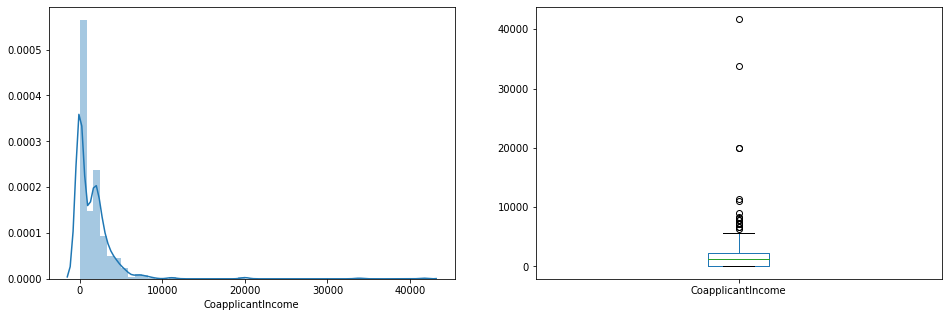

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_original['CoapplicantIncome'])

plt.subplot(122)
train_original['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

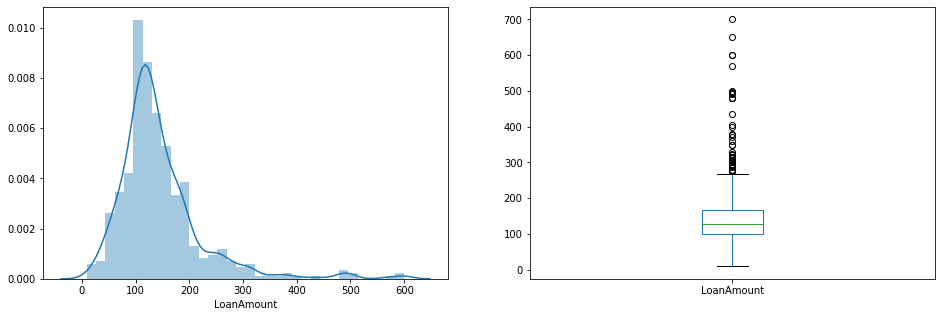

In [22]:
plt.figure(1)
plt.subplot(121)
df=train_original.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train_original['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

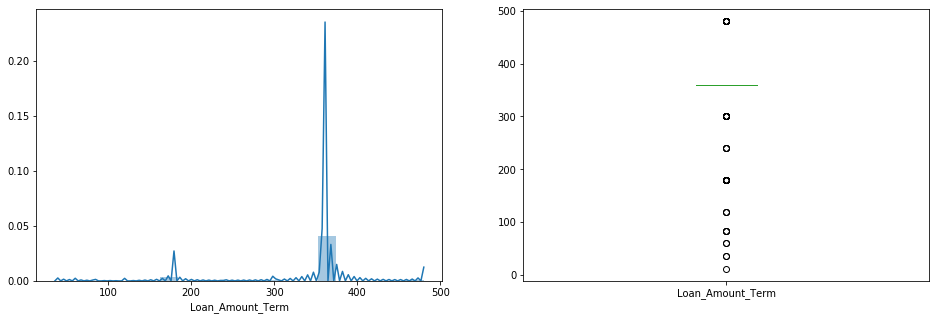

In [23]:
plt.figure(1)
plt.subplot(121)
df=train_original.dropna()
sns.distplot(df['Loan_Amount_Term']);

plt.subplot(122)
train_original['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

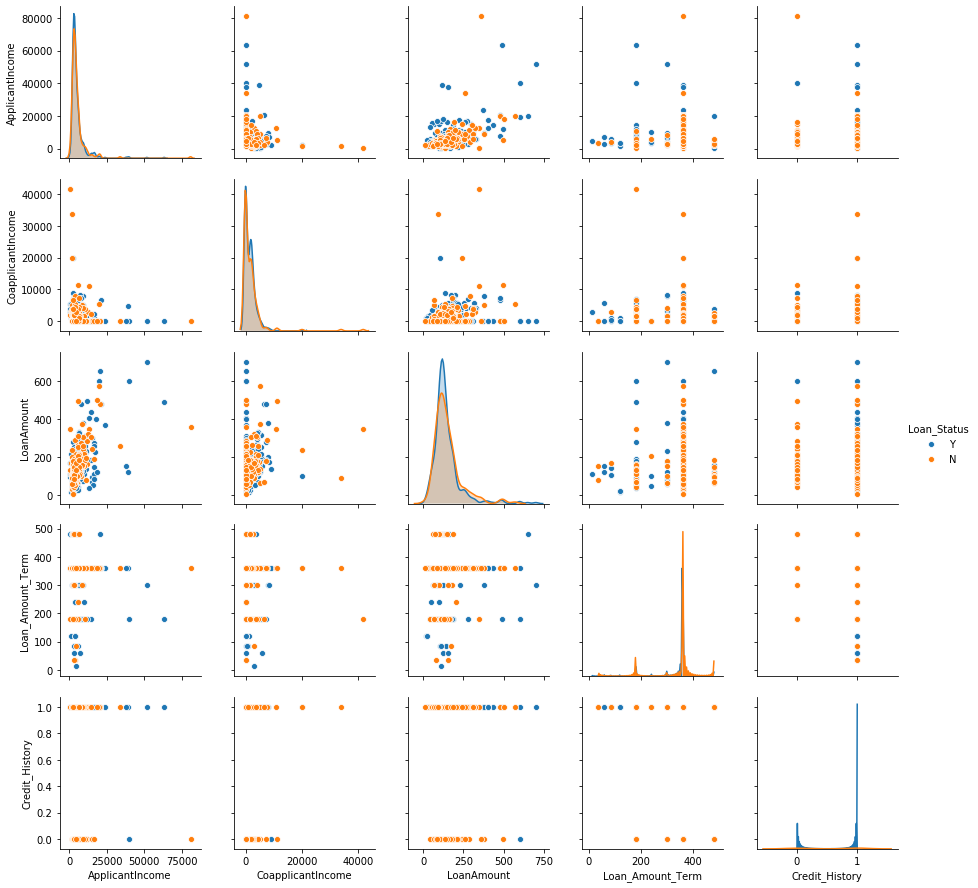

In [24]:
sns.pairplot(train_original,hue='Loan_Status')

# Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


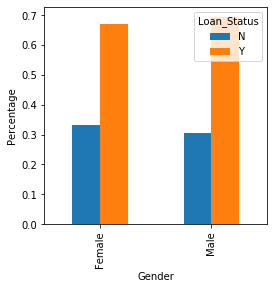

In [25]:

print(pd.crosstab(train_original['Gender'],train_original['Loan_Status']))

Gender=pd.crosstab(train_original['Gender'],train_original['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


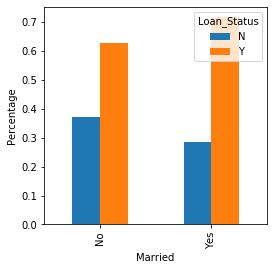

In [26]:
print(pd.crosstab(train_original['Married'],train_original['Loan_Status']))

Married=pd.crosstab(train_original['Married'],train_original['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

We can infer that percentage of married people who have got their loan approved is higher when compared to non- married people.

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


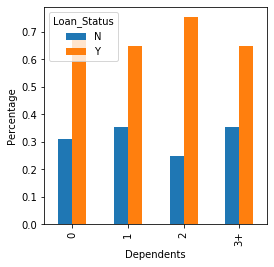

In [27]:
print(pd.crosstab(train_original['Dependents'],train_original['Loan_Status']))

Dependents=pd.crosstab(train_original['Dependents'],train_original['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

The percentage of applicants with either 0 or 2 dependents have got their loan approved is higher.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


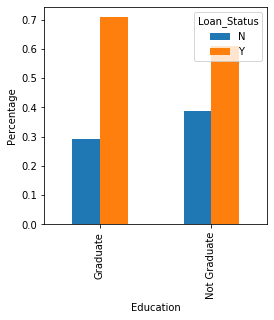

In [28]:
print(pd.crosstab(train_original['Education'],train_original['Loan_Status']))

Education=pd.crosstab(train_original['Education'],train_original['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

The percentage of applicants who are graduates have got their loan approved rather than the one who are not graduates.

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


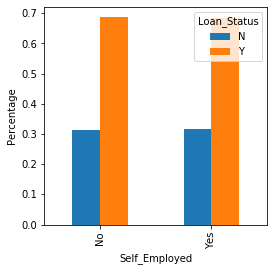

In [29]:
print(pd.crosstab(train_original['Self_Employed'],train_original['Loan_Status']))

Self_Employed=pd.crosstab(train_original['Self_Employed'],train_original['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

There is hardly any correlation between Loan_Status and Self_Employed applicants. So in short we can say that it doesn’t matter whether the applicant is self employed or not.

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


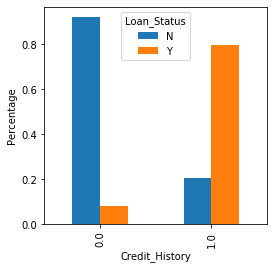

In [30]:
print(pd.crosstab(train_original['Credit_History'],train_original['Loan_Status']))

Credit_History=pd.crosstab(train_original['Credit_History'],train_original['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

The percentage of applicants who  have good Credit_History their loan approved easily rather than the one who have bad Credit_History.

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


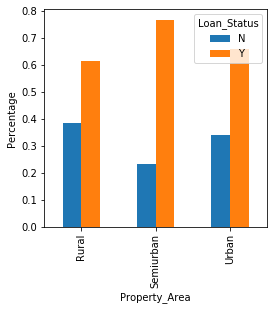

In [31]:
print(pd.crosstab(train_original['Property_Area'],train_original['Loan_Status']))

Property_Area=pd.crosstab(train_original['Property_Area'],train_original['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Property_Area')
p = plt.ylabel('Percentage')

In [32]:
train_original['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [33]:
train_original['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
train_original.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
test_original.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#  Data Preparation

**DATA CLEANING AND STRUCTURING-**
Now we structure our dataset.

We use train dataset here, train dataset is a copy of original dataset(train_original).


In [36]:
a=train['CoapplicantIncome'].median()
print(a)
b=train['LoanAmount'].median()
print(b)

1188.5
128.0


In [37]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace= True)

train['CoapplicantIncome'].replace(0,a,inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)

In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
a1=train['CoapplicantIncome'].median()
print(a)


1188.5


In [40]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace= True)

test['CoapplicantIncome'].replace(0,a1,inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

In [41]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

We fill all the missing values.<br>
Now we change all categorical values into numerical values

In [42]:
# replacing 3+ in Dependents variable with 3
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [43]:
#replacing 3+ in dependents variable with 3.
#replacing Y and N 

In [44]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [45]:
train.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,1188.5,128.0,360.0,1.0,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,...,1,0,1,1,0,1,0,1,0,0
